In [2]:
!pip install networkx

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 640.0 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.6 MB 2.1 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.6 MB 2.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.6 MB 3.3 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.6 MB 3.9 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.6 MB 3.8 MB/s eta 0:00:01
   --------------------------- ------------ 1.1/1.6 MB 3.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.4/1.6 MB 3.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.4/1.6 MB 3.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.4/1.6 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 3.2 MB/s eta 0:00:00


필요한 라이브러리 불러오기

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import time 
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans

In [2]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### 1. 데이터 로드 및 정제

In [3]:
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [14,14]

데이터 불러오기

In [4]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


date_added를 object 형식에서 datetime 형식으로 변경

In [5]:
from datetime import datetime

df['date_added'] = df['date_added'].dropna().apply(lambda x: datetime.strptime(x.strip(), "%B %d, %Y"))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


연도, 월, 일을 date_added에서 추출하여 데이터 프레임에 각각 삽입

In [6]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day

지금까지 작업한 df를 original_df에 copy해서 저장

In [7]:
original_df = df.copy()

director, listed_in, cast, country 컬럼을 리스트로 저장하고 NaN이면 빈 리스트를 생성

In [8]:
df['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['categories'] = df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['actors'] = df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['countries'] = df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,directors,categories,actors,countries
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,9.0,"[Richard Finn, Tim Maltby]","[Children & Family Movies, Comedies]","[Alan Marriott, Andrew Toth, Brian Dobson, Col...","[United States, India, South Korea, China]"
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,9.0,[],[Stand-Up Comedy],[Jandino Asporaat],[United Kingdom]
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,8.0,[],[Kids' TV],"[Peter Cullen, Sumalee Montano, Frank Welker, ...",[United States]
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,8.0,[],[Kids' TV],"[Will Friedle, Darren Criss, Constance Zimmer,...",[United States]
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,8.0,[Fernando Lebrija],[Comedies],"[Nesta Cooper, Kate Walsh, John Michael Higgin...",[United States]


### 2. TF-IDF 행렬 생성

TF-IDF (Term Frequency-Inverse Document Frequency)
- 텍스트 데이터를 벡터로 변환
- 각 단어의 상대적인 중요성을 수치적으로 표현

- 텍스트 데이터 로드
  - 영화의 설명부분 (description)
- TfidfVectorizer 인스턴스 생성
  - 문서 집합에서 TF-IDF 특징 추출
  - max_df : 단어가 너무 자주 나타나는 경우 제외.
  - min_df : 단어가 너무 적게 나타나는 경우 제외.
  - stop_words : 불용어를 제거
  - lowercase : 모든 텍스트를 소문자로 변환
  - use_idf : IDF를 사용하여 가중치 부여
  - norm : 벡터 정규화 방법 지정
  - smooth_idf : 0으로 나누는 오류 방지
- fit_transform 호출
  - 텍스트 데이터 (description)를 TF-IDF 벡터로 변환

L2 norm
- 벡터의 각 원소를 제곱하여 더한 후 제곱근을 취하는 방식으로 벡터의 크기 계산
- 벡터의 길이가 1이 되도록 만든다.

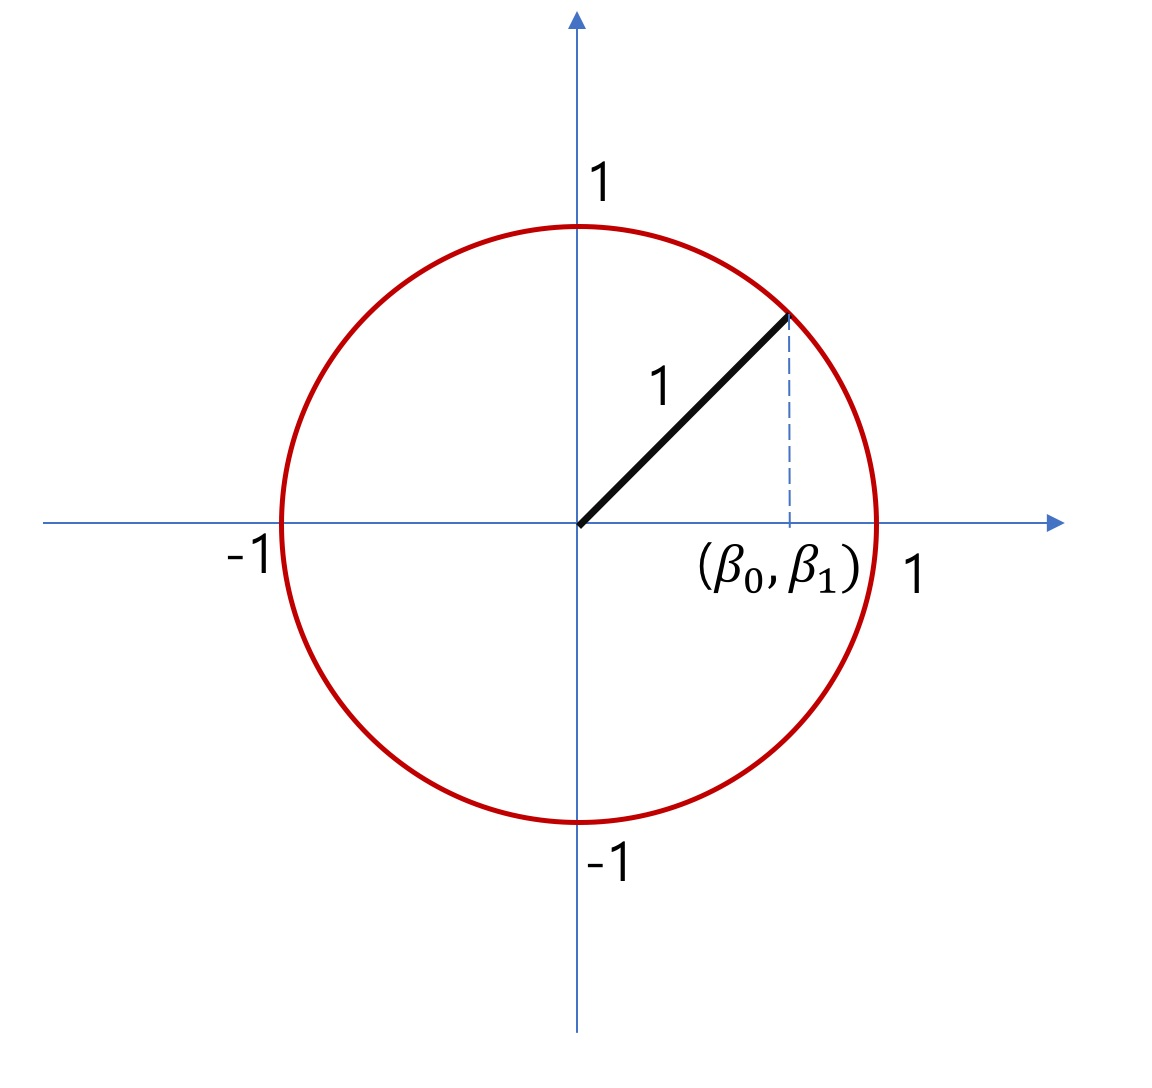  

In [10]:
text_content = df['description']
vector = TfidfVectorizer(max_df=0.4,  # 문서의 40%를 넘는 단어 제외
                             min_df=1,  # 최소 1번 이상 나오는 단어 사용
                             stop_words='english',  # 영어의 불용어 제거
                             lowercase=True,
                             use_idf=True, 
                             norm=u'l2',  # 유클리드 norm (L2 norm)
                             smooth_idf=True
                            )
tfidf = vector.fit_transform(text_content)

### 3. K-means 클러스터링 적용

- 클러스터의 개수를 설정하기 위해 k값을 설정
- MiniBatchKMeans 모델 초기화
  - MiniBatchKMeans는 K-means 알고리즘을 기반
  - Dataset이 클 때 효율적으로 동작
  - n_clusters : 클러스터 개수
  - n_init : 무작위 초기 중심점 설정 횟수.  =>  경고 제거하기 위해 명시적으로 설정
- TF-IDF 벡터로 MiniBatchKMeans 모델을 학습하고 클러스터링 수행
- cluster_centers_ : 각 클러스터의 중심 (행 - 클러스터의 중심. 열 - TF-IDF의 값의 index)
  - argsort()[:,::-1] => TF-IDF가 큰 순서대로 index를 내림차순으로 반환. => 클러스터에 속한 단어들을 중요도 순으로 확인
- get_feature_names_out : 클러스터링된 단어 목록 추출
- transform() : 텍스트 데이터를 TF-IDF 벡터로 변환
- predict() : 새로운 데이터 클러스터를 할당
- 클러스터에 속한 데이터 개수 계산 => 클러스터에 속한 데이터 분포 확인

In [11]:
k = 200  # 클러스터의 개수 설정
kmeans = MiniBatchKMeans(n_clusters = k, n_init=3)  # MiniBatchKMeans 모델 초기화
kmeans.fit(tfidf)  # TF-IDF 벡터로 모델 학습, 클러스터링 수행
centers = kmeans.cluster_centers_.argsort()[:,::-1]  # 클러스터 중심점을 TF-IDF가 큰 순서대로 index를 내림차순으로 반환
terms = vector.get_feature_names_out()  # 클러스터링된 단어 목록 추출
request_transform = vector.transform(df['description'])  # 데이터의 description의 각 텍스트를 TF-IDF 벡터로 변환

df['cluster'] = kmeans.predict(request_transform)  # 새로운 데이터 클러스터를 예측. cluster 열에 저장
df['cluster'].value_counts().head()  # 클러스터에 속한 데이터 개수 계산

cluster
24     4667
35      884
77      163
163     104
62       98
Name: count, dtype: int64

### 4. 그래프 생성

유사도 높은 문서들의 index 찾기  
1. 코사인 유사도 계산
  - linear_kernel : 두 행렬 간의 내적 계산
  - index를 사용해서 특정 문서 선택
  - 특정 TF-IDF 벡터와 전체 TF-IDF 코사인 유사도 계산
  - 계산된 코사인 유사도를 1차원 배열로 변환 (flatten)

2. 유사한 문서 인덱스 찾기
  - 코사인 유사도 배열을 역순으로 정렬. 
  - 자기 자신과는 유사도를 비교하지 않는다. (index와 같지 같을 때)
  - 모든 index를 추출

3. 가장 유사한 문서 인덱스 반환
  - top_n (default = 5)개 만큼 유사도가 가장 높은 순서대로 index list 반환

In [12]:
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()  # 코사인 유사도 계산
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]  # 유사한 문서 index 찾기
    return [index for index in related_docs_indices][0:top_n]  # 가장 유사한 문서 index 반환

NetworkX 그래프 구축 과정

1. MOVIE 그래프 생성
2. 영화 제목 노드 추가
  - show_id를 key 값 (고유 식별자)
  - label를 MOVIE
  - 

In [50]:
G = nx.Graph(label="MOVIE")  # MOVIE 라벨의 빈 그래프 생성.
start_time = time.time()
for i, rowi in df.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))  # index가 1000개씩 수행시간 출력
    G.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])  # 노드 속성 추가 (영화 제목)

    for element in rowi['actors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['categories']:
        G.add_node(element,label="CAT")
        G.add_edge(rowi['title'], element, label="CAT_IN")
    for element in rowi['directors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['countries']:
        G.add_node(element,label="COU")
        G.add_edge(rowi['title'], element, label="COU_IN")
    
    indices = find_similar(tfidf, i, top_n = 5)
    snode="Sim("+rowi['title'][:15].strip()+")"        
    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['title'], snode, label="SIMILARITY")
    for element in indices:
        G.add_edge(snode, df['title'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time))

 iter 0 -- 0.009647607803344727 seconds --
 iter 1000 -- 1.8911399841308594 seconds --
 iter 2000 -- 3.617870330810547 seconds --
 iter 3000 -- 5.43316650390625 seconds --
 iter 4000 -- 7.259637832641602 seconds --
 iter 5000 -- 9.119305610656738 seconds --
 iter 6000 -- 10.987910985946655 seconds --
 finish -- 11.428560733795166 seconds --


### 5. 2개의 영화 비교

In [51]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):        
                sub_graph.add(e)
    return list(sub_graph)

In [52]:
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="MOVIE":
            colors.append('blue')
        elif G.nodes[e]['label']=="PERSON":
            colors.append('red')
        elif G.nodes[e]['label']=="CAT":
            colors.append('green')
        elif G.nodes[e]['label']=="COU":
            colors.append('yellow')
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('orange')    
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('orange')

    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()

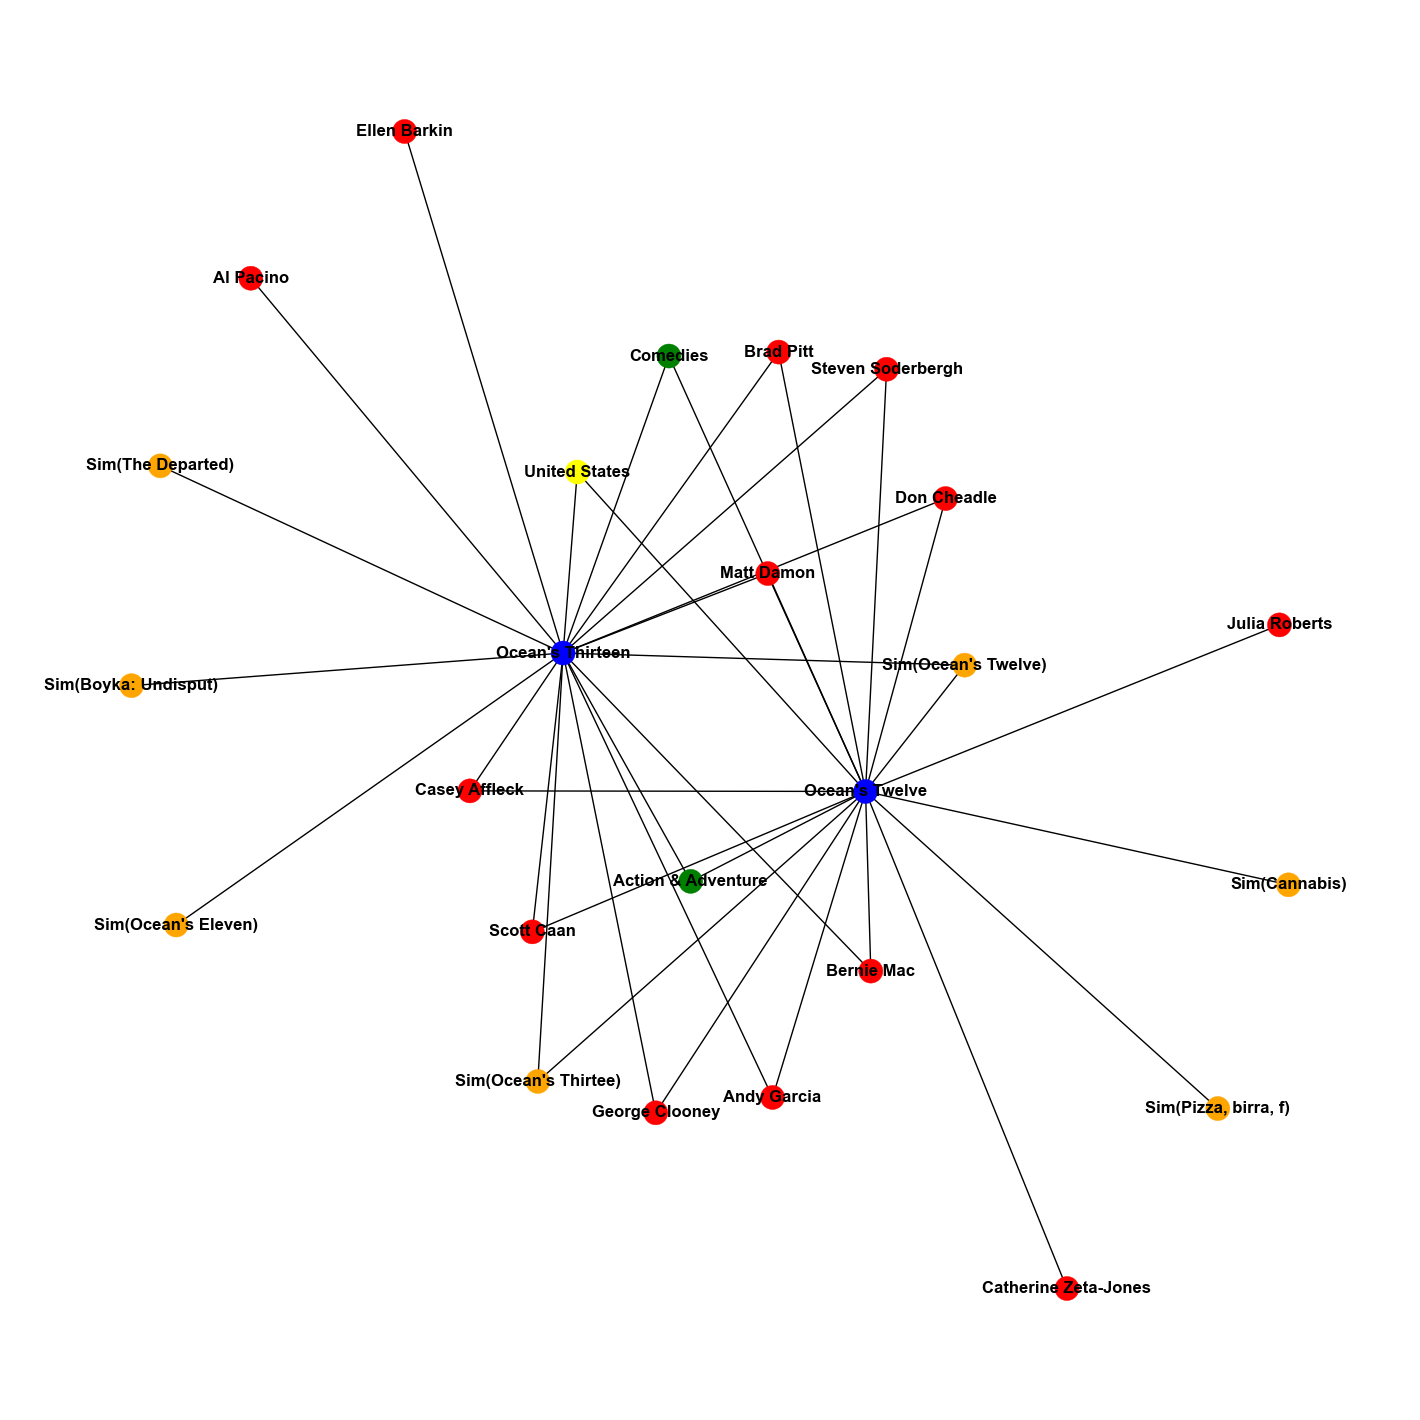

In [53]:
list_in=["Ocean's Twelve","Ocean's Thirteen"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

### 6. 추천 함수

In [54]:
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="MOVIE":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        movies.append(key) 
        weight.append(w)
    
    result = pd.Series(data=np.array(weight),index=movies)
    result.sort_values(inplace=True,ascending=False)        
    return result

### 7. 추천 받기

In [56]:
result = get_recommendation("Ocean's Twelve")
result2 = get_recommendation("Ocean's Thirteen")
result3 = get_recommendation("The Devil Inside")
result4 = get_recommendation("Stranger Things")
print("*"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"*"*40)
print(result.head())
print()
print("*"*40+"\n Recommendation for 'Ocean's Thirteen'\n"+"*"*40)
print(result2.head())
print()
print("*"*40+"\n Recommendation for 'Belmonte'\n"+"*"*40)
print(result3.head())
print()
print("*"*40+"\n Recommendation for 'Stranger Things'\n"+"*"*40)
print(result4.head())
print()

****************************************
 Recommendation for 'Ocean's Twelve'
****************************************
Ocean's Thirteen     7.575565
Ocean's Eleven       1.542593
The Informant!       1.346214
Babel                1.199195
The Mask of Zorro    1.194038
dtype: float64

****************************************
 Recommendation for 'Ocean's Thirteen'
****************************************
Ocean's Twelve       7.575565
Ocean's Eleven       2.100704
The Departed         1.698527
Brooklyn's Finest    1.492545
Boyka: Undisputed    1.400020
dtype: float64

****************************************
 Recommendation for 'Belmonte'
****************************************
The Devil and Father Amorth              1.423117
Making a Murderer                        1.243407
Belief: The Possession of Janet Moses    1.116221
The Autopsy of Jane Doe                  1.032475
The Diabolical                           1.032475
dtype: float64

****************************************
 Recomme